In [1]:
#Libraries
from functools import reduce
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
import random
from random import choice
import matplotlib.pyplot as plt
import seaborn as sns
from zipfile import ZipFile
import wget
import gzip
import os
import locale
from datetime import datetime
from dateutil.parser import parse
from scipy.stats import iqr
from sklearn import preprocessing

First create a list with the unique identifies for zipped CSV files on Insideairbnb. This section will ultimately be replaced with new code that will scrape the name off the site programatically.

In [2]:
ibnbdts = [
'2019-09-17',
'2019-08-12',
'2019-07-10',
'2019-06-07',
'2019-05-14',
'2019-04-10',
'2019-03-08',
'2019-02-06',
'2019-01-14',
'2018-12-10',
'2018-11-07',
'2018-10-10',
'2018-09-11',
'2018-08-14',
'2018-07-10',
'2018-06-09',
'2018-05-14',
'2018-04-12',
'2018-02-07',
'2018-01-17',
'2017-12-09',
'2017-11-13',
'2017-10-07',
'2017-09-12',
'2017-08-06',
'2017-07-06',
'2017-06-05',
'2017-05-07',
'2017-04-08',
'2017-03-06',
'2017-02-09',
'2017-01-04',
'2016-12-08',
'2016-11-07',
'2016-01-03',
'2015-10-02',
'2015-09-04',
'2015-07-17',
'2015-04-30']

The below downloaded 39 zip files from Insideairbnb and takes a while. Run at your own peril but be warned that it will overwrite the files that are already there for your convenience.

In [ ]:
#url = 'http://data.insideairbnb.com/spain/catalonia/barcelona/{}/data/listings.csv.gz'
#folder = '../data/'
#count = 0
#remain = 39
#old_FN = '../data2/listings.csv.gz'
#new_FN = '../data2/listings{}.csv.gz'
#print("This will take some time - however progress will be displayed below")
#for i in ibnbdts:
#    wget.download(url.format(i), folder)
#    os.rename(old_FN,new_FN.format(i))
#    count += 1
#    remain -= 1
#    print(f'You have downloaded {count} file(s) just {remain} to go.')
#
#print("All files downloaded. You may proceed") 

Create a new dictionary (df_dict) into which we will pass the contents of each zipped file as a value with the key name coming from a concatination of 'df' and the date of the scrape (which are stored within the elements of the list ibnbdts - defined above). Add a column which identifies the date it was scraped (from list defined above)

In [5]:
df_dict = {}
new_FN = '../data/listings{}.csv.gz'
dfname = 'df{}'
for i in ibnbdts:
    df_dict[dfname.format(i)] = pd.read_csv(gzip.open(new_FN.format(i), 'rb'))
    df_dict[dfname.format(i)]['import_dt'] = i 
print("Load of zip files finished. You may proceed")

C:\Users\ellio\Anaconda3\envs\test\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (43,61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\ellio\Anaconda3\envs\test\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\ellio\Anaconda3\envs\test\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\ellio\Anaconda3\envs\test\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (43,88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=inter

Load of zip files finished. You may proceed


Create a new list into which each dataframe (currently residing as values within the dictionary created above) will be added. Then use the DataFrame Concat feature to turn the list into a consolidated dataframe.

In [6]:
df_staging = []
for key in df_dict:
    df_staging.append(df_dict[key])
    
df = pd.concat(df_staging, ignore_index=True, sort=True)

Perform exploratory data analysis (EDA). The first step is to look at XXXXX
1. Look at dataframe shape
x. Look at dataframe info
x. Look at dataframe head
x. Count the number of Nans by column

In [7]:
df.isna().sum()

access              350342
accommodates             0
amenities            12033
availability_30         16
availability_365        16
                     ...  
thumbnail_url       412893
transit             298069
weekly_price        604877
xl_picture_url      412893
zipcode              28257
Length: 107, dtype: int64

Identify columns of interest and created a new dataframe with only columns of interest.

In [8]:
df_filtered = df[[
        'id',
        'last_scraped',
        'neighbourhood_cleansed',
        'neighbourhood_group_cleansed',
        'latitude',
        'longitude',
        'property_type',
        'room_type',
        'bathrooms',
        'bedrooms',
        'beds',
        'price',
        'import_dt']]

In [9]:
df_filtered.describe()

,id,latitude,longitude,bathrooms,bedrooms,beds
count,6.961910e+05,696191.000000,696191.000000,694812.000000,695699.000000,695061.000000
mean,1.346948e+07,41.392245,2.167440,1.295245,1.537321,2.240244
std,9.359402e+06,0.014948,0.018094,0.615929,0.985990,1.888418
min,5.808000e+03,41.330810,2.056991,0.000000,0.000000,0.000000
25%,5.197866e+06,41.380489,2.156780,1.000000,1.000000,1.000000
50%,1.326902e+07,41.389435,2.167893,1.000000,1.000000,2.000000
75%,1.998535e+07,41.402442,2.178107,1.500000,2.000000,3.000000
max,3.867327e+07,41.472114,2.231701,26.000000,16.000000,50.000000


In [10]:
df_filtered.shape

(696191, 13)

In [11]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696191 entries, 0 to 696190
Data columns (total 13 columns):
id                              696191 non-null int64
last_scraped                    696191 non-null object
neighbourhood_cleansed          696191 non-null object
neighbourhood_group_cleansed    696191 non-null object
latitude                        696191 non-null float64
longitude                       696191 non-null float64
property_type                   696188 non-null object
room_type                       696191 non-null object
bathrooms                       694812 non-null float64
bedrooms                        695699 non-null float64
beds                            695061 non-null float64
price                           696191 non-null object
import_dt                       696191 non-null object
dtypes: float64(5), int64(1), object(7)
memory usage: 69.0+ MB


In [12]:
df_filtered.columns

Index(['id', 'last_scraped', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'bathrooms', 'bedrooms', 'beds', 'price',
       'import_dt'],
      dtype='object')

Identify the room types (to determine which to exclude).

In [13]:
df_filtered.room_type.unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

Identify indexies of rows within dataframe that are not 'Entire home/apt' and drop them from the dataframe.
It should be noted that there are 696191 rows peforming this step.

In [14]:
indexNames = df_filtered[ df_filtered['room_type'] != 'Entire home/apt' ].index
df_filtered = df_filtered.drop(indexNames)

Now determine how many rows remain.

In [15]:
df_filtered.shape

(333564, 13)

Identify the different property types (to determine which to exclude).

In [16]:
df_filtered.property_type.unique()

array(['Apartment', 'Loft', 'Condominium', 'House', 'Serviced apartment',
       'Boat', 'Guest suite', 'Townhouse', 'Villa', 'Chalet',
       'Tiny house', 'Other', 'Guesthouse', 'Camper/RV',
       'Casa particular (Cuba)', 'Earth house', 'Dome house', 'Hotel',
       'Nature lodge', 'Aparthotel', 'Hostel', 'Houseboat', 'Barn',
       'Casa particular', 'Bed and breakfast', 'Dorm', 'Farm stay',
       'Resort', 'Hut', 'Boutique hotel', 'In-law', 'Bungalow',
       'Vacation home', 'Cabin', 'Timeshare', 'Castle', 'Earth House',
       'Bed & Breakfast', 'Floor', 'Tent', 'Train', 'Cave'], dtype=object)

Identify indexies of rows within dataframe that are not of interest and drop them from the dataframe.
It should be noted that there are XXXX rows before peforming this step. Also drop the rows with Nan value here.

In [17]:
property_type2keep = ['Apartment', 'Loft',  'Condominium' ] # ,'Serviced apartment', 'House', 'Townhouse']
indexNames = df_filtered[ ~df_filtered['property_type'].isin( property_type2keep) ].index
df_filtered.drop(indexNames, inplace=True)
df_filtered.dropna(subset=['property_type'], inplace=True) 

# Now determine how many rows remain.
df_filtered.shape

(313478, 13)

In [18]:
#Check that this worked
df_filtered.property_type.unique()

array(['Apartment', 'Loft', 'Condominium'], dtype=object)

Determine if there are any Nan values remaining within the filtered dataset.

In [19]:
df_filtered.isna().sum()

id                                0
last_scraped                      0
neighbourhood_cleansed            0
neighbourhood_group_cleansed      0
latitude                          0
longitude                         0
property_type                     0
room_type                         0
bathrooms                       487
bedrooms                        322
beds                            188
price                             0
import_dt                         0
dtype: int64

In [20]:
#Create a new column that turns current nightly price (string with preceeding $) into float
locale.setlocale(locale.LC_ALL,'')
df_filtered['priceUSD']=df_filtered.price.map(lambda x: locale.atof(x.strip('$')))

Create box plots to identify outliers.

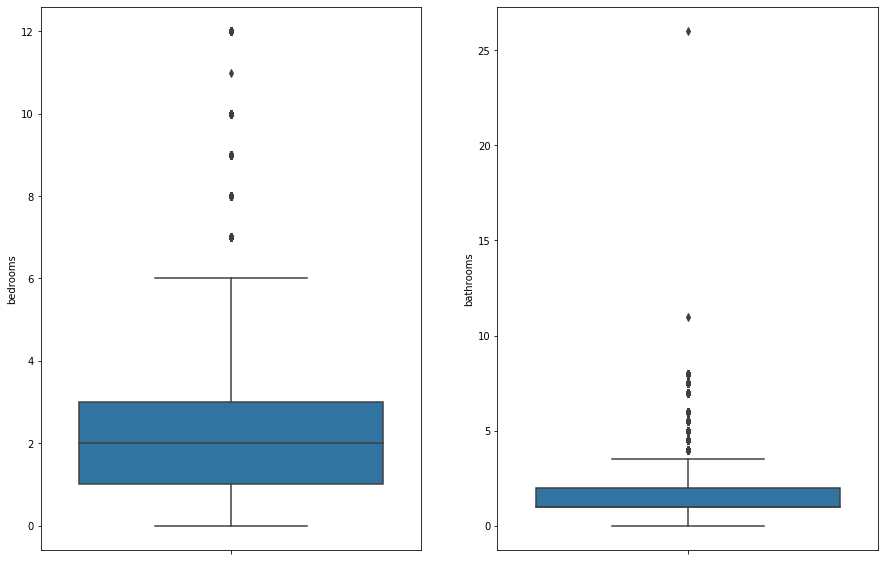

In [21]:
fig, ax = plt.subplots(1,2, figsize = (15, 10)) #columns and rows, number of axes, figure size 
sns.boxplot(y = df_filtered.bedrooms, ax = ax[0]) #selecting y and axes where to draw
sns.boxplot(y = df_filtered.bathrooms, ax = ax[1])


Drop properties with less than one bathroom, as all property/ room types remaining should be self contained wellings with a bathroom. Also remove properties with more than 4 bathrooms as they are not the norm and likely to distort the data.
Also delete those with Nan values. Once complete, see how many rows return.

In [22]:
indexNames = df_filtered[ df_filtered['bathrooms'] <= 1.5 ].index
df_filtered.drop(indexNames , inplace=True)

indexNames = df_filtered[ df_filtered['bathrooms'] > 2 ].index
df_filtered.drop(indexNames , inplace=True)

df_filtered.dropna(subset = ['bathrooms'], inplace=True)

df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77539 entries, 1 to 696186
Data columns (total 14 columns):
id                              77539 non-null int64
last_scraped                    77539 non-null object
neighbourhood_cleansed          77539 non-null object
neighbourhood_group_cleansed    77539 non-null object
latitude                        77539 non-null float64
longitude                       77539 non-null float64
property_type                   77539 non-null object
room_type                       77539 non-null object
bathrooms                       77539 non-null float64
bedrooms                        77497 non-null float64
beds                            77506 non-null float64
price                           77539 non-null object
import_dt                       77539 non-null object
priceUSD                        77539 non-null float64
dtypes: float64(6), int64(1), object(7)
memory usage: 8.9+ MB


Drop properties with more than 5 bedrooms as they are not the norm and likely to distort the data.
Also replace Nan values with 0 - as these could be studios apartments without physical bedrooms. Once complete, see how many rows remain.

In [23]:
values = {'bedrooms': 0,}
df_filtered.fillna(value=values, inplace=True)

indexNames = df_filtered[ df_filtered['bedrooms'] != 2 ].index
df_filtered.drop(indexNames , inplace=True)

df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26930 entries, 25 to 696182
Data columns (total 14 columns):
id                              26930 non-null int64
last_scraped                    26930 non-null object
neighbourhood_cleansed          26930 non-null object
neighbourhood_group_cleansed    26930 non-null object
latitude                        26930 non-null float64
longitude                       26930 non-null float64
property_type                   26930 non-null object
room_type                       26930 non-null object
bathrooms                       26930 non-null float64
bedrooms                        26930 non-null float64
beds                            26926 non-null float64
price                           26930 non-null object
import_dt                       26930 non-null object
priceUSD                        26930 non-null float64
dtypes: float64(6), int64(1), object(7)
memory usage: 3.1+ MB


Create a version of the clean dataframe that doesn't have duplicates and only shows the most recent values

In [24]:
#Create a new copy of filtered DF called df_filteredND (No Duplicates)
df_filteredND = df_filtered

#Now to sort by id (property unique identifier) ascending and import date descending
df_filteredND.sort_values(['id', 'import_dt'], ascending=[True, False],inplace=True)

#remove duplicate - now showing most recent (as will be useful for last known price on platform, etc)
df_filteredND = df_filteredND.drop_duplicates(subset='id', keep='first')

df_filteredND.shape

(2772, 14)

In [25]:
df_filteredND.head()

,id,last_scraped,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,bathrooms,bedrooms,beds,price,import_dt,priceUSD
690330,36620,2015-04-30,"Sant Pere, Santa Caterina i la Ribera",Ciutat Vella,41.386929,2.183409,Apartment,Entire home/apt,2.0,2.0,3.0,$120.00,2015-04-30,120.0
355238,41952,2018-01-17,el Camp d'en Grassot i Gràcia Nova,Gràcia,41.405653,2.169320,Apartment,Entire home/apt,2.0,2.0,4.0,$110.00,2018-01-17,110.0
650620,59333,2015-10-02,Sarrià,Sarrià-Sant Gervasi,41.408367,2.115572,Apartment,Entire home/apt,2.0,2.0,5.0,$212.00,2015-10-02,212.0
25,66037,2019-09-17,"Sant Pere, Santa Caterina i la Ribera",Ciutat Vella,41.383220,2.182340,Apartment,Entire home/apt,2.0,2.0,3.0,$190.00,2019-09-17,190.0
31,71603,2019-09-17,la Dreta de l'Eixample,Eixample,41.390380,2.176060,Apartment,Entire home/apt,2.0,2.0,4.0,$390.00,2019-09-17,390.0


Create a new dataframe that contains each property (identified by 'id' column) also include date(s) it was scraped and price.

In [26]:
df_slim_stg = df_filtered[['id','import_dt']]

df_slim_stg.sort_values(['id', 'import_dt'], ascending=[True, False],inplace=True)

C:\Users\ellio\Anaconda3\envs\test\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
df_slim_stg.head()

,id,import_dt
690330,36620,2015-04-30
355238,41952,2018-01-17
389752,41952,2017-12-09
408459,41952,2017-11-13
426432,41952,2017-10-07


Use existing column value (string) to make a datetime date to calculate duration that property is/ has been on the platform.

In [28]:
def strtodate(row):
    '''
    Input: String in format YYYY-MM-DD
    Output: Correspdining Datetime
    
    The purpose of this function is to convert a string to datetime, so that timedeltas can be calculated on them.
    '''
    return datetime.strptime(row['import_dt'], '%Y-%m-%d')


df_slim_stg['scrape_dt'] = df_slim_stg.apply(strtodate, axis = 1)

df_slim_stg.head()

C:\Users\ellio\Anaconda3\envs\test\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,id,import_dt,scrape_dt
690330,36620,2015-04-30,2015-04-30
355238,41952,2018-01-17,2018-01-17
389752,41952,2017-12-09,2017-12-09
408459,41952,2017-11-13,2017-11-13
426432,41952,2017-10-07,2017-10-07


In [29]:
df_slim = df_slim_stg.groupby('id').agg({'scrape_dt' : [np.min, np.max]})

#Drop the index as this is property identifier (id). This will make a new column to be renamed.
df_slim = df_slim.reset_index()

#Check output
df_slim.head()

id  scrape_dt           
               amin       amax
0  36620 2015-04-30 2015-04-30
1  41952 2015-04-30 2018-01-17
2  59333 2015-04-30 2015-10-02
3  66037 2015-04-30 2019-09-17
4  71603 2019-07-10 2019-09-17

Create a new colum that determines if the property is still active on the platform.

In [30]:
def mostrecent(row):
    '''
    Input: Date
    Output: 1 if date matches 17 September 2019 or 0 if it does not
    
    This will help to determine if the property is still active on the platform.
    '''
    if row == datetime.strptime('2019-09-17', '%Y-%m-%d'):
        return 1
    else:
        return 0


df_slim['stillactive'] = df_slim['scrape_dt']['amax'].apply(mostrecent)

#Check output

df_slim.head()

id  scrape_dt            stillactive
               amin       amax            
0  36620 2015-04-30 2015-04-30           0
1  41952 2015-04-30 2018-01-17           0
2  59333 2015-04-30 2015-10-02           0
3  66037 2015-04-30 2019-09-17           1
4  71603 2019-07-10 2019-09-17           1

In [31]:
#Check to see how many 'still active rows there are
df_slim['stillactive'].value_counts()

0    1987
1     785
Name: stillactive, dtype: int64

Create a new columns to calculate the number of days that the property has been on the platform.

In [32]:
def daysonline(row):
    '''
    Input: First Date and Last Dates that the property was seen on the platform
    Output: Number of days
    
    This will help to determine how long the  property is/ was listed on the platform for.
    '''
    return row['scrape_dt']['amax'] - row['scrape_dt']['amin']

df_slim['days_online'] = df_slim.apply(daysonline, axis = 1)

#Check output
df_slim.head()

id  scrape_dt            stillactive days_online
               amin       amax                        
0  36620 2015-04-30 2015-04-30           0      0 days
1  41952 2015-04-30 2018-01-17           0    993 days
2  59333 2015-04-30 2015-10-02           0    155 days
3  66037 2015-04-30 2019-09-17           1   1601 days
4  71603 2019-07-10 2019-09-17           1     69 days

Create a final dataframe from df_slim and df_filteredND

In [34]:
df_final = pd.merge(df_slim,df_filteredND
                    [['id', 'neighbourhood_cleansed','neighbourhood_group_cleansed','latitude',
                      'longitude','property_type','bathrooms','bedrooms','priceUSD']],
                    left_on='id', right_on='id', how='left')

C:\Users\ellio\Anaconda3\envs\test\lib\site-packages\pandas\core\reshape\merge.py:617: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


In [35]:
df_final.head()

,id,"(id, )","(scrape_dt, amin)","(scrape_dt, amax)","(stillactive, )","(days_online, )",neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,bathrooms,bedrooms,priceUSD
0,36620,36620,2015-04-30,2015-04-30,0,0 days,"Sant Pere, Santa Caterina i la Ribera",Ciutat Vella,41.386929,2.183409,Apartment,2.0,2.0,120.0
1,41952,41952,2015-04-30,2018-01-17,0,993 days,el Camp d'en Grassot i Gràcia Nova,Gràcia,41.405653,2.169320,Apartment,2.0,2.0,110.0
2,59333,59333,2015-04-30,2015-10-02,0,155 days,Sarrià,Sarrià-Sant Gervasi,41.408367,2.115572,Apartment,2.0,2.0,212.0
3,66037,66037,2015-04-30,2019-09-17,1,1601 days,"Sant Pere, Santa Caterina i la Ribera",Ciutat Vella,41.383220,2.182340,Apartment,2.0,2.0,190.0
4,71603,71603,2019-07-10,2019-09-17,1,69 days,la Dreta de l'Eixample,Eixample,41.390380,2.176060,Apartment,2.0,2.0,390.0


Drop the coulumns not required (i.e. duplicates resulting from the join)

In [36]:
df_final = df_final.drop(df_final.columns[1], axis=1)

In [37]:
df_final.head(10)

,id,"(scrape_dt, amin)","(scrape_dt, amax)","(stillactive, )","(days_online, )",neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,bathrooms,bedrooms,priceUSD
0,36620,2015-04-30,2015-04-30,0,0 days,"Sant Pere, Santa Caterina i la Ribera",Ciutat Vella,41.386929,2.183409,Apartment,2.0,2.0,120.0
1,41952,2015-04-30,2018-01-17,0,993 days,el Camp d'en Grassot i Gràcia Nova,Gràcia,41.405653,2.169320,Apartment,2.0,2.0,110.0
2,59333,2015-04-30,2015-10-02,0,155 days,Sarrià,Sarrià-Sant Gervasi,41.408367,2.115572,Apartment,2.0,2.0,212.0
3,66037,2015-04-30,2019-09-17,1,1601 days,"Sant Pere, Santa Caterina i la Ribera",Ciutat Vella,41.383220,2.182340,Apartment,2.0,2.0,190.0
4,71603,2019-07-10,2019-09-17,1,69 days,la Dreta de l'Eixample,Eixample,41.390380,2.176060,Apartment,2.0,2.0,390.0
5,77407,2015-07-17,2017-07-06,0,720 days,l'Antiga Esquerra de l'Eixample,Eixample,41.393725,2.152760,Apartment,2.0,2.0,450.0
6,78810,2015-04-30,2015-07-17,0,78 days,el Barri Gòtic,Ciutat Vella,41.381073,2.179053,Apartment,2.0,2.0,160.0
7,81291,2015-04-30,2018-11-07,0,1287 days,el Poblenou,Sant Martí,41.404765,2.202640,Apartment,2.0,2.0,139.0
8,86940,2015-04-30,2015-07-17,0,78 days,el Barri Gòtic,Ciutat Vella,41.382138,2.178860,Apartment,2.0,2.0,150.0
9,93379,2015-07-17,2015-10-02,0,77 days,el Raval,Ciutat Vella,41.381212,2.167703,Apartment,2.0,2.0,60.0


#Rename columns of new dataframe into something more meaningful

In [39]:
df_final = df_final.rename(columns = {
df_final.columns[0] : 'propertyID',
df_final.columns[1] : 'DTfirst',
df_final.columns[2] : 'DTlast',
df_final.columns[3] : 'stillactive',
df_final.columns[4] : 'days_online'
})

df_final.head()

,propertyID,DTfirst,DTlast,stillactive,days_online,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,bathrooms,bedrooms,priceUSD
0,36620,2015-04-30,2015-04-30,0,0 days,"Sant Pere, Santa Caterina i la Ribera",Ciutat Vella,41.386929,2.183409,Apartment,2.0,2.0,120.0
1,41952,2015-04-30,2018-01-17,0,993 days,el Camp d'en Grassot i Gràcia Nova,Gràcia,41.405653,2.169320,Apartment,2.0,2.0,110.0
2,59333,2015-04-30,2015-10-02,0,155 days,Sarrià,Sarrià-Sant Gervasi,41.408367,2.115572,Apartment,2.0,2.0,212.0
3,66037,2015-04-30,2019-09-17,1,1601 days,"Sant Pere, Santa Caterina i la Ribera",Ciutat Vella,41.383220,2.182340,Apartment,2.0,2.0,190.0
4,71603,2019-07-10,2019-09-17,1,69 days,la Dreta de l'Eixample,Eixample,41.390380,2.176060,Apartment,2.0,2.0,390.0


We have seen in the Box Plot above that there are a vast variety of prices. In order to remove outliers, XXXX. The existing values need to be normalised in order for this to work.

In [40]:
#Normalize the new 'priceUSD' column for analysis
# Create variable x and pass in the float verion of column 'priceUSD'
x = df_final[['priceUSD']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Append the normalised values within a new column in the dataframe.
df_final['priceNORM'] = pd.DataFrame(x_scaled)

In [41]:
#First find values that are UNDER 1.5 Standard Deviations of the mean
indexNames = df_final[ df_final['priceNORM'] < (np.mean(df_final.priceNORM, axis=0) - ( 1.5 * np.std(df_final.priceNORM, axis=0)) ) ].index
df_final.drop(indexNames , inplace=True)

#Second find values that are ABOVE 1.5 Standard Deviations of the mean
indexNames = df_final[ df_final['priceNORM'] > (np.mean(df_final.priceNORM, axis=0) + ( 1.5 * np.std(df_final.priceNORM, axis=0)) ) ].index
df_final.drop(indexNames , inplace=True)


Plot a new Box Plot to see how the remaining price data is looking.

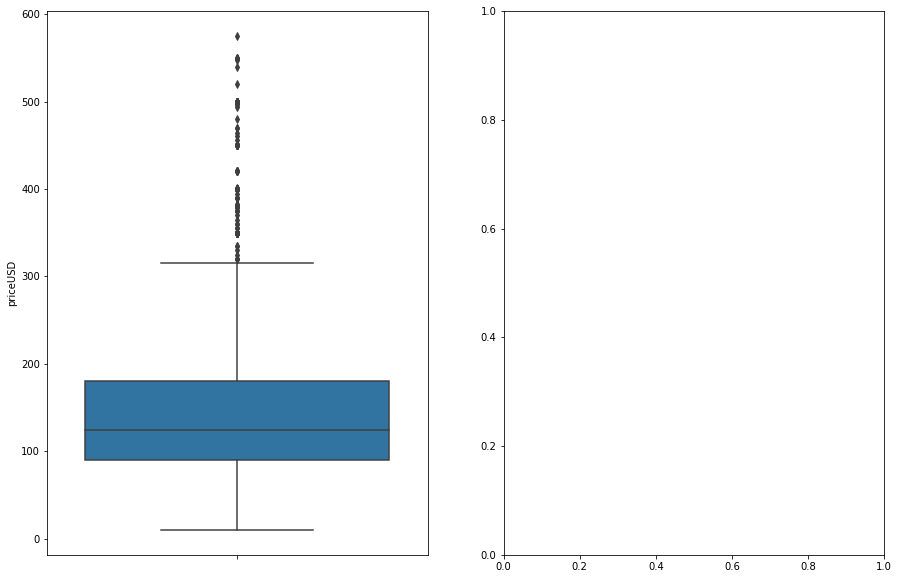

In [42]:
fig, ax = plt.subplots(1,2, figsize = (15, 10)) #columns and rows, number of axes, figure size 
sns.boxplot(y = df_final.priceUSD, ax = ax[0])

Now prices are normalised, they will be banded for ease of interpretation on the survival plot.

In [43]:
df_final['price_band']=pd.qcut(df_final['priceUSD'],q=5, labels = ['Very Low','Low','Moderate','High','Very High'])

Convert timedelta64 so that calculations may be performed.

In [44]:
df_final['days'] = df_final['days_online'].astype('timedelta64[D]')

#Check output
df_final.head()

,propertyID,DTfirst,DTlast,stillactive,days_online,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,bathrooms,bedrooms,priceUSD,priceNORM,price_band,days
0,36620,2015-04-30,2015-04-30,0,0 days,"Sant Pere, Santa Caterina i la Ribera",Ciutat Vella,41.386929,2.183409,Apartment,2.0,2.0,120.0,0.022044,Moderate,0.0
1,41952,2015-04-30,2018-01-17,0,993 days,el Camp d'en Grassot i Gràcia Nova,Gràcia,41.405653,2.169320,Apartment,2.0,2.0,110.0,0.020040,Low,993.0
2,59333,2015-04-30,2015-10-02,0,155 days,Sarrià,Sarrià-Sant Gervasi,41.408367,2.115572,Apartment,2.0,2.0,212.0,0.040481,Very High,155.0
3,66037,2015-04-30,2019-09-17,1,1601 days,"Sant Pere, Santa Caterina i la Ribera",Ciutat Vella,41.383220,2.182340,Apartment,2.0,2.0,190.0,0.036072,High,1601.0
4,71603,2019-07-10,2019-09-17,1,69 days,la Dreta de l'Eixample,Eixample,41.390380,2.176060,Apartment,2.0,2.0,390.0,0.076152,Very High,69.0


In [45]:
#The newly calculated days online value needs to be converted into months.

def days2month(row):
    '''
    Input: Numerical value which is assumed to be days
    Output: Corresponding numner of months
    
    The int/ float input (days) is divided by 365 then multiplied by 12.
    '''
    return ((row['days']/365)*12)


df_final['months'] = df_final.apply(days2month, axis = 1)

#Check output
df_final.head()

,propertyID,DTfirst,DTlast,stillactive,days_online,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,bathrooms,bedrooms,priceUSD,priceNORM,price_band,days,months
0,36620,2015-04-30,2015-04-30,0,0 days,"Sant Pere, Santa Caterina i la Ribera",Ciutat Vella,41.386929,2.183409,Apartment,2.0,2.0,120.0,0.022044,Moderate,0.0,0.000000
1,41952,2015-04-30,2018-01-17,0,993 days,el Camp d'en Grassot i Gràcia Nova,Gràcia,41.405653,2.169320,Apartment,2.0,2.0,110.0,0.020040,Low,993.0,32.646575
2,59333,2015-04-30,2015-10-02,0,155 days,Sarrià,Sarrià-Sant Gervasi,41.408367,2.115572,Apartment,2.0,2.0,212.0,0.040481,Very High,155.0,5.095890
3,66037,2015-04-30,2019-09-17,1,1601 days,"Sant Pere, Santa Caterina i la Ribera",Ciutat Vella,41.383220,2.182340,Apartment,2.0,2.0,190.0,0.036072,High,1601.0,52.635616
4,71603,2019-07-10,2019-09-17,1,69 days,la Dreta de l'Eixample,Eixample,41.390380,2.176060,Apartment,2.0,2.0,390.0,0.076152,Very High,69.0,2.268493


In [46]:
df_final_export = df_final[['propertyID','DTfirst','DTlast','stillactive',
                           'months','neighbourhood_cleansed','neighbourhood_group_cleansed','latitude',
                            'longitude','property_type','bathrooms','bedrooms','priceNORM','price_band','months']]

In [47]:
df_final_export.neighbourhood_group_cleansed.unique()

array(['Ciutat Vella', 'Gràcia', 'Sarrià-Sant Gervasi', 'Eixample',
       'Sant Martí', 'Sants-Montjuïc', 'Horta-Guinardó', 'Sant Andreu',
       'Les Corts', 'Nou Barris'], dtype=object)

In [48]:
df_eixample = df_final_export.loc[df_final_export['neighbourhood_group_cleansed'] == 'Eixample']

In [49]:
df_gracia = df_final_export.loc[df_final_export['neighbourhood_group_cleansed'] == 'Gràcia']

In [50]:
df_final_export.to_csv('df_final_export2.csv')
df_eixample.to_csv('df_eixample2.csv')
df_gracia.to_csv('df_gracia2.csv')